In [59]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [60]:
NER = spacy.load('en_core_web_sm')

## Load Book

In [61]:
import os

book = open("data/MartinLings-Muhammad.txt", "r", encoding="utf8").read()
book_doc = NER(book)

In [62]:
# visualize identified entities
displacy.render(book_doc[34000:36000], style="ent", jupyter=True)

### Scholars Name

In [63]:
name_1 = pd.read_csv('data/character/Recipe_ori__242116643_1.csv')
name_2 = pd.read_csv('data/character/Recipe_ori__242116643_2.csv')
name_3 = pd.read_csv('data/character/Recipe_ori__242116643_3.csv')

In [64]:
scholars_name = pd.concat([name_1, name_2, name_3], ignore_index=True)
scholars_name.rename(columns={'Column 1' : 'name'}, inplace=True)
scholars_name

,name
0,al-Zbrqan bin al-Harith al-Nmyry
1,al-Zbrqan bin Bashyr bin 'Amr
2,Znkl Shykh
3,Znkl bin Ala bin Mhjn
4,Zrarh bin Mus'ab al-Shny
...,...
25243,Zakaria Shykh
25244,Zakaria bin 'Umar
25245,Zufar bin Abi Kathir al-Shaymi al-Hanfi
25246,Za'id'h bin Aws al-Kndy


In [65]:
import re
scholars_name['name'] = scholars_name['name'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
scholars_name['firstname'] = scholars_name['name'].apply(lambda x: x.split(' ',1)[0])
scholars_name

,name,firstname
0,al-Zbrqan bin al-Harith al-Nmyry,al-Zbrqan
1,al-Zbrqan bin Bashyr bin 'Amr,al-Zbrqan
2,Znkl Shykh,Znkl
3,Znkl bin Ala bin Mhjn,Znkl
4,Zrarh bin Mus'ab al-Shny,Zrarh
...,...,...
25243,Zakaria Shykh,Zakaria
25244,Zakaria bin 'Umar,Zakaria
25245,Zufar bin Abi Kathir al-Shaymi al-Hanfi,Zufar
25246,Za'id'h bin Aws al-Kndy,Za'id'h


In [66]:
sent_entity_df = []

#loop through sentence, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({'Sentence': sent, 'entities': entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [67]:
sent_entity_df

,Sentence,entities
0,"(MUHAMMAD, \n\n, his, life, based, on, the, ea...","[II, 4, Quraysh, Hollow, 6, The Vow to Sacrifi..."
1,"(2, 3, \n\n, IX, \n\n, Two, Bereavements, \n\n...","[2 3, Two, 27, Bahlra the Monk, 29, 3i, 33, 37]"
2,"(The, Rebuilding, of, the, Ka’bah, \n\n, 4i, \...","[The Rebuilding of the Ka’bah, 4i, 43, 46, War..."
3,"(50, \n\n, XVIII, \n\n, Quraysh, Take, Action,...",[50]
4,"(5, 2, \n\n, XIX, \n\n, Aws, and, Khazraj, \n\...","[5 2, 56, XX, Abu Jahl, Hamzah, 58]"
...,...,...
7503,"(They, still, had, in, their, ears, the, sound...",[]
7504,"(Your, tryst, with, me, is, at, the, \n, Pool,...",[]
7505,"(Having, delivered, his, message, in, this, wo...","[Hereafter, the Key of Mercy, 3, Paradise, the..."
7506,"(Verily, God, and, His, angels, whelm, in, ble...",[]


In [68]:
# Function to filter out non-character entities
def filter_entity(ent_list, scholars_name):
    return[ent for ent in ent_list
           if ent in list(scholars_name.name)
           or ent in list(scholars_name.firstname)]

In [69]:
filter_entity(["Muhammad", "Ali", "Izzham"], scholars_name)

['Muhammad', 'Ali']

In [70]:
sent_entity_df['scholars_entities'] = sent_entity_df['entities'].apply(lambda x : filter_entity(x, scholars_name))

# filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['scholars_entities'].map(len) > 0]
sent_entity_df_filtered

,Sentence,entities,scholars_entities
0,"(MUHAMMAD, \n\n, his, life, based, on, the, ea...","[II, 4, Quraysh, Hollow, 6, The Vow to Sacrifi...",[Quraysh]
5,"(60, \n\n, XXII, \n\n, Leaders, of, Quraysh, \...","[60, Quraysh, 64, XXIII \n\nWonderment, 67, 70...",[Quraysh]
16,"(The, Succession, and, the, Burial, \n\n, 342,...","[342, Steven W. Johnson, 346, Quraysh, Hollow,...",[Quraysh]
36,"(2, Muhammad, \n\n\n, which, must, not, flow, ...","[2, Muhammad, Hagar, His Angels]",[Muhammad]
64,"(“, It, descended, from, Paradise, whiter, \n,...","[Paradise, Adam]",[Adam]
...,...,...,...
7464,"(344, Muhammad, \n\n, bidding, them, pledge, t...","[344, Muhammad, Abu Bakr, second, two, 1]",[Muhammad]
7465,"(A, recent, Revelation, had, recalled, the, \n...","[Revelation, Abu Bakr, Prophet, 2, one]",[Prophet]
7473,"(4, \n\n, After, the, prayer, the, Prophet, ’s...","[4, Prophet]",[Prophet]
7476,"(‘, Abbas, and, his, sons, Fadl, and, \n, Qith...","[Abbas, Fadl, Qitham, Usamah, Shuqran, one, Pr...","[Abbas, Fadl, Usamah, Shuqran, Prophet]"


In [71]:
sent_entity_df_filtered['scholars_entities'] = sent_entity_df_filtered['scholars_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\maizz\AppData\Local\Temp\ipykernel_18004\409511784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['scholars_entities'] = sent_entity_df_filtered['scholars_entities'].apply(lambda x: [item.split()[0] for item in x])


In [72]:
sent_entity_df_filtered

,Sentence,entities,scholars_entities
0,"(MUHAMMAD, \n\n, his, life, based, on, the, ea...","[II, 4, Quraysh, Hollow, 6, The Vow to Sacrifi...",[Quraysh]
5,"(60, \n\n, XXII, \n\n, Leaders, of, Quraysh, \...","[60, Quraysh, 64, XXIII \n\nWonderment, 67, 70...",[Quraysh]
16,"(The, Succession, and, the, Burial, \n\n, 342,...","[342, Steven W. Johnson, 346, Quraysh, Hollow,...",[Quraysh]
36,"(2, Muhammad, \n\n\n, which, must, not, flow, ...","[2, Muhammad, Hagar, His Angels]",[Muhammad]
64,"(“, It, descended, from, Paradise, whiter, \n,...","[Paradise, Adam]",[Adam]
...,...,...,...
7464,"(344, Muhammad, \n\n, bidding, them, pledge, t...","[344, Muhammad, Abu Bakr, second, two, 1]",[Muhammad]
7465,"(A, recent, Revelation, had, recalled, the, \n...","[Revelation, Abu Bakr, Prophet, 2, one]",[Prophet]
7473,"(4, \n\n, After, the, prayer, the, Prophet, ’s...","[4, Prophet]",[Prophet]
7476,"(‘, Abbas, and, his, sons, Fadl, and, \n, Qith...","[Abbas, Fadl, Qitham, Usamah, Shuqran, one, Pr...","[Abbas, Fadl, Usamah, Shuqran, Prophet]"


### Create Relationship

In [73]:
windows_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]) :
    end_i = min(i+5, sent_entity_df_filtered.index[-1]) #if ada yang kurang 5 line
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].scholars_entities),[])
    
    #remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1 :
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source":a, "target":b})

In [74]:
relationship_df = pd.DataFrame(relationships)

In [75]:
relationship_df

,source,target
0,Quraysh,Zuhrah
1,Quraysh,Zuhrah
2,Zuhrah,Quraysh
3,Quraysh,Zuhrah
4,Zuhrah,Quraysh
...,...,...
9893,Abbas,Fadl
9894,Fadl,Usamah
9895,Usamah,Shuqran
9896,Shuqran,Prophet


In [76]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns=relationship_df.columns)
relationship_df

,source,target
0,Quraysh,Zuhrah
1,Quraysh,Zuhrah
2,Quraysh,Zuhrah
3,Quraysh,Zuhrah
4,Quraysh,Zuhrah
...,...,...
9893,Abbas,Fadl
9894,Fadl,Usamah
9895,Shuqran,Usamah
9896,Prophet,Shuqran


In [77]:
relationship_df['values'] = 1
relationship_df = relationship_df.groupby(['source', 'target'], sort=False, as_index=False).sum()
relationship_df

,source,target,values
0,Quraysh,Zuhrah,28
1,Hashim,Quraysh,25
2,Hashim,Zuhrah,9
3,Aws,Salma,5
4,Amr,Salma,6
...,...,...,...
496,Fadl,Thawban,12
497,Anas,Thawban,5
498,Abbas,Thawban,5
499,Shuqran,Usamah,6


### Graph analysis and visualization

In [78]:
# create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                           source = "source",
                           target = "target",
                           edge_attr = "values",
                           create_using = nx.Graph())

### Graph Visualization - NetworkX

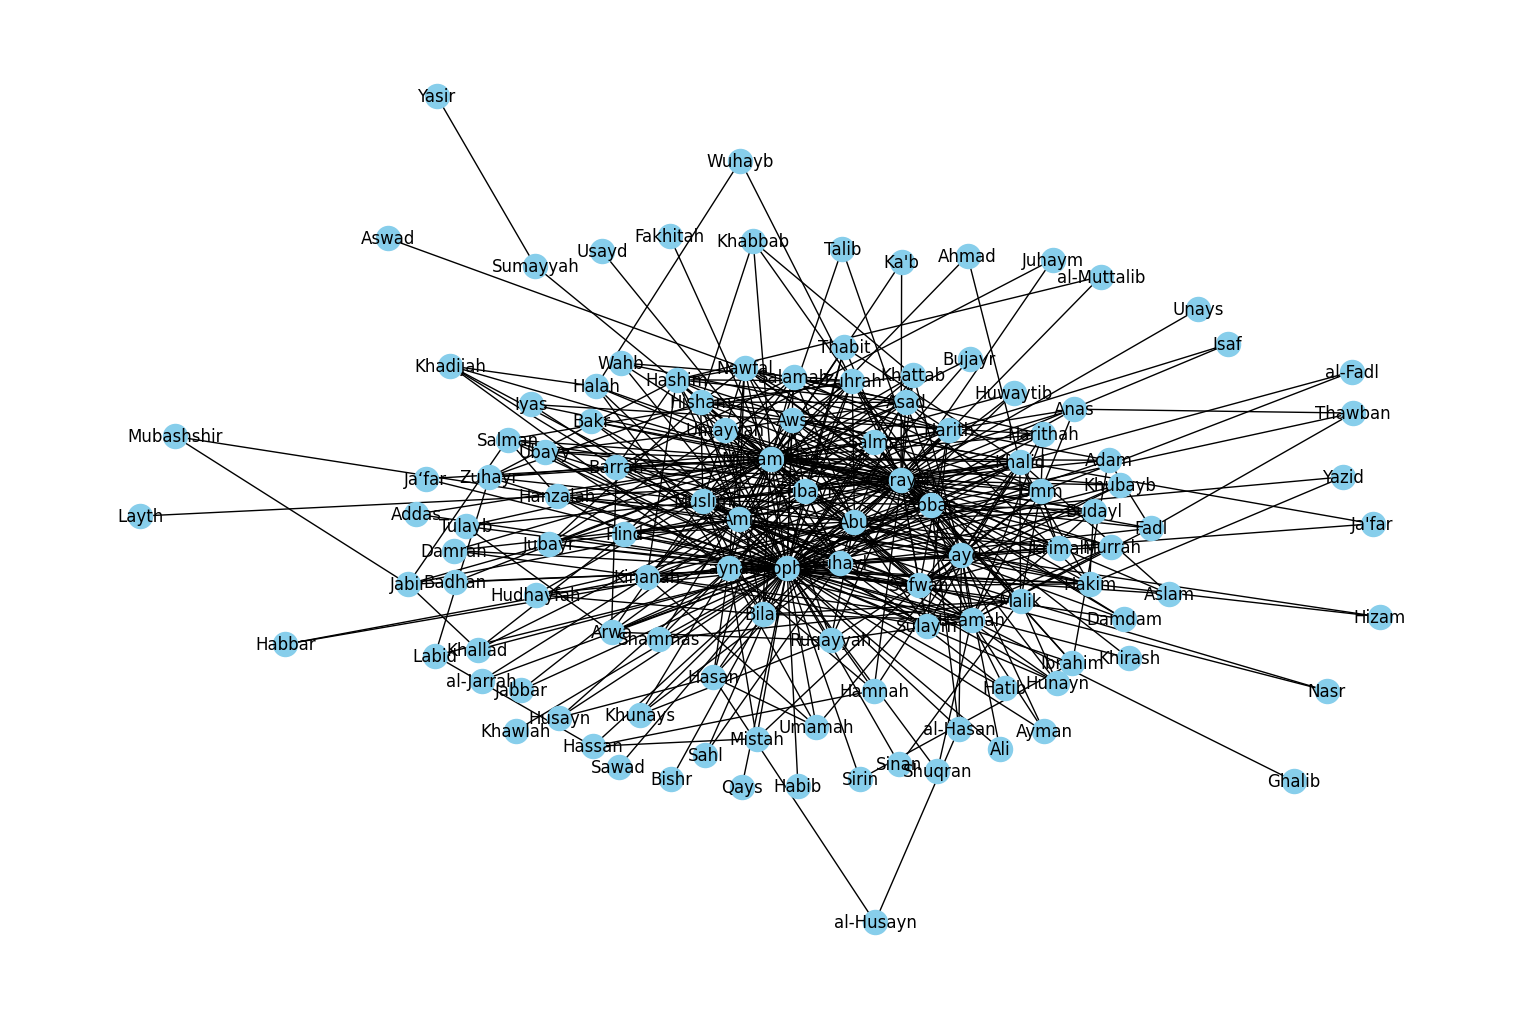

In [79]:
plt.figure(figsize=(15,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

### Graph Visualization - PyVis


In [80]:
dict(G.degree)

{'Quraysh': 54,
 'Zuhrah': 15,
 'Hashim': 13,
 'Aws': 15,
 'Salma': 13,
 'Amr': 31,
 'Nawfal': 14,
 'al-Muttalib': 2,
 'Harith': 14,
 'Isaf': 2,
 'Zubayr': 19,
 'Muhammad': 64,
 'Asad': 12,
 'Prophet': 91,
 'Wahb': 4,
 'Wuhayb': 2,
 'Halah': 6,
 'Kinanah': 12,
 'Unays': 1,
 'Abbas': 25,
 'Adam': 6,
 'Talib': 2,
 'Ja‘far': 2,
 'Fakhitah': 1,
 'Barrah': 10,
 'Khadijah': 5,
 'Zaynab': 27,
 'Ruqayyah': 9,
 'Zayd': 29,
 'Ayman': 3,
 'Hakim': 12,
 'Hizam': 2,
 'Harithah': 8,
 'Abu': 31,
 'Umayyah': 13,
 'al-Jarrah': 2,
 'Khalid': 22,
 'Ahmad': 2,
 'Arwa': 8,
 'Usamah': 18,
 'Iyas': 3,
 'Hisham': 14,
 'Hind': 9,
 'Tulayb': 4,
 'Aswad': 1,
 'Umm': 15,
 'Zuhayr': 7,
 'Salamah': 9,
 'Suhayl': 20,
 'Hatib': 3,
 'Khattab': 8,
 'Ubayy': 5,
 'Bilal': 10,
 'Sumayyah': 2,
 'Yasir': 1,
 'Shammas': 4,
 'Khabbab': 4,
 'Muslim': 23,
 'Labid': 3,
 'Addas': 2,
 'Jubayr': 6,
 'Khawlah': 1,
 'Usayd': 1,
 'Hamnah': 5,
 'Khunays': 4,
 'Salman': 7,
 'Sahl': 2,
 'Hanzalah': 10,
 'Damdam': 4,
 'Juhaym': 2,
 'Sawad

In [121]:
from pyvis.network import Network
net = Network(notebook=True, width="100%", height="700px",bgcolor='#222222', font_color='white', cdn_resources='local')

node_degree=dict(G.degree)

#Setting up node size attr
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("prophet.html")

prophet.html


### The most important nodes

In [85]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Quraysh': 0.46153846153846156,
 'Zuhrah': 0.12820512820512822,
 'Hashim': 0.11111111111111112,
 'Aws': 0.12820512820512822,
 'Salma': 0.11111111111111112,
 'Amr': 0.26495726495726496,
 'Nawfal': 0.11965811965811968,
 'al-Muttalib': 0.017094017094017096,
 'Harith': 0.11965811965811968,
 'Isaf': 0.017094017094017096,
 'Zubayr': 0.1623931623931624,
 'Muhammad': 0.5470085470085471,
 'Asad': 0.10256410256410257,
 'Prophet': 0.7777777777777779,
 'Wahb': 0.03418803418803419,
 'Wuhayb': 0.017094017094017096,
 'Halah': 0.05128205128205129,
 'Kinanah': 0.10256410256410257,
 'Unays': 0.008547008547008548,
 'Abbas': 0.2136752136752137,
 'Adam': 0.05128205128205129,
 'Talib': 0.017094017094017096,
 'Ja‘far': 0.017094017094017096,
 'Fakhitah': 0.008547008547008548,
 'Barrah': 0.08547008547008547,
 'Khadijah': 0.042735042735042736,
 'Zaynab': 0.23076923076923078,
 'Ruqayyah': 0.07692307692307693,
 'Zayd': 0.2478632478632479,
 'Ayman': 0.025641025641025644,
 'Hakim': 0.10256410256410257,
 'Hizam': 0

<Axes: >

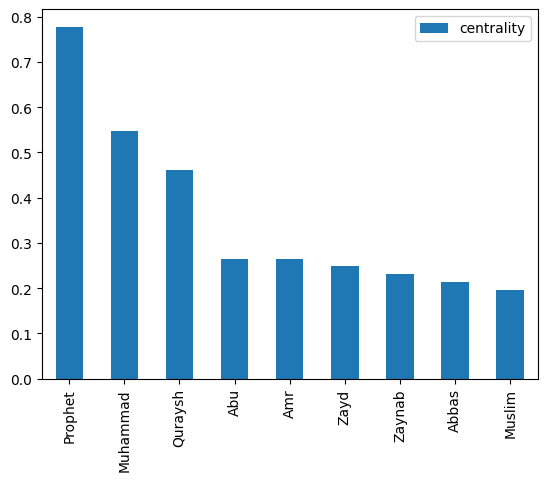

In [87]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient="index", columns=['centrality'])
# plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

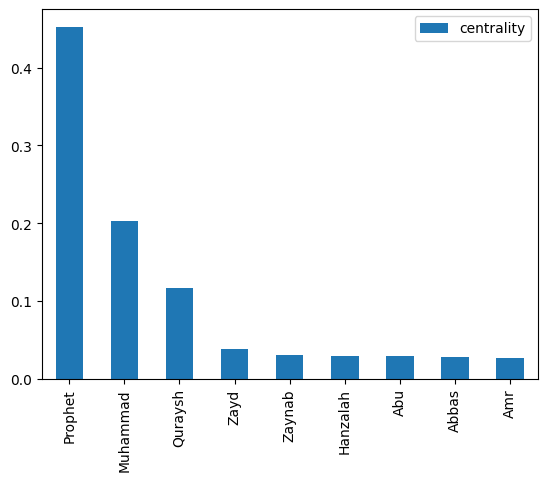

In [88]:
# between centrality
betweeness_dict = nx.betweenness_centrality(G)
betweeness_df = pd.DataFrame.from_dict(betweeness_dict, orient='index', columns=['centrality'])
betweeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar') 

<Axes: >

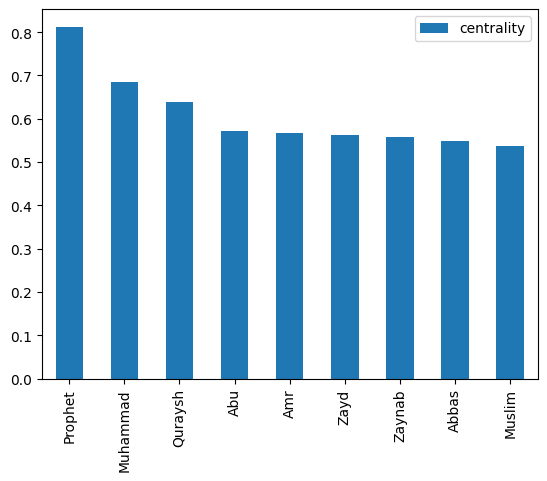

In [89]:
# closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

In [91]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweeness_dict, 'betweeness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community Detection

In [113]:
import community.community_louvain as community_louvain


In [117]:
communities = community_louvain.best_partition(G)

In [118]:
communities

{'Quraysh': 0,
 'Zuhrah': 1,
 'Hashim': 0,
 'Aws': 2,
 'Salma': 0,
 'Amr': 3,
 'Nawfal': 0,
 'al-Muttalib': 0,
 'Harith': 0,
 'Isaf': 0,
 'Zubayr': 2,
 'Muhammad': 1,
 'Asad': 0,
 'Prophet': 4,
 'Wahb': 1,
 'Wuhayb': 1,
 'Halah': 1,
 'Kinanah': 5,
 'Unays': 0,
 'Abbas': 4,
 'Adam': 4,
 'Talib': 4,
 'Ja‘far': 1,
 'Fakhitah': 1,
 'Barrah': 2,
 'Khadijah': 1,
 'Zaynab': 5,
 'Ruqayyah': 2,
 'Zayd': 6,
 'Ayman': 6,
 'Hakim': 6,
 'Hizam': 6,
 'Harithah': 6,
 'Abu': 2,
 'Umayyah': 0,
 'al-Jarrah': 3,
 'Khalid': 6,
 'Ahmad': 6,
 'Arwa': 2,
 'Usamah': 6,
 'Iyas': 2,
 'Hisham': 0,
 'Hind': 3,
 'Tulayb': 2,
 'Aswad': 0,
 'Umm': 6,
 'Zuhayr': 0,
 'Salamah': 2,
 'Suhayl': 4,
 'Hatib': 4,
 'Khattab': 1,
 'Ubayy': 0,
 'Bilal': 2,
 'Sumayyah': 1,
 'Yasir': 1,
 'Shammas': 4,
 'Khabbab': 1,
 'Muslim': 2,
 'Labid': 4,
 'Addas': 1,
 'Jubayr': 0,
 'Khawlah': 4,
 'Usayd': 1,
 'Hamnah': 4,
 'Khunays': 4,
 'Salman': 3,
 'Sahl': 4,
 'Hanzalah': 3,
 'Damdam': 4,
 'Juhaym': 0,
 'Sawad': 4,
 'Fadl': 4,
 'Safwan':

In [119]:
nx.set_node_attributes(G, communities, 'group')


In [122]:
com_net = Network(notebook=True, width='100%', height='700px', bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("index.html")

index.html
